In [13]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


mnist = keras.datasets.mnist

# load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
print(x_train.shape) # 28 x 28 = 784
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


print MNIST excamples

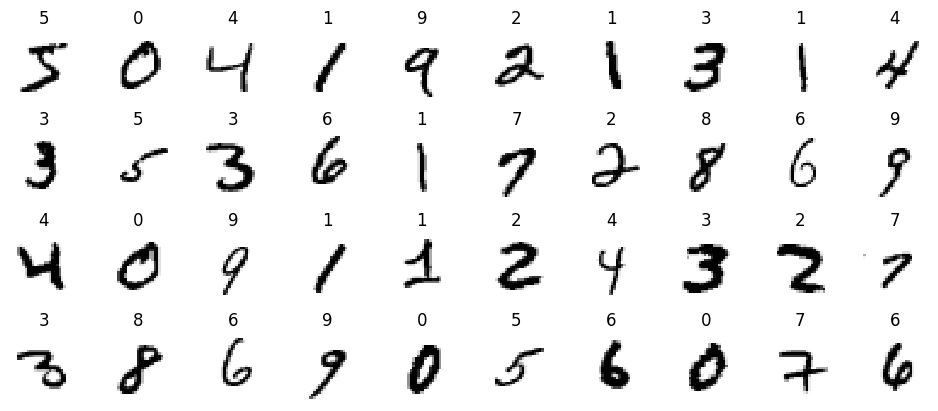

In [ ]:
import matplotlib.pyplot as plt
 
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Normal Random Forest

In [11]:
print("Before x_train.shape:", x_train.shape)

# reshpae (, 28, 28) -> (, 784) so that we can put it into Random Forest Classifier
x_train = x_train.reshape(-1, 28 * 28)  
x_test = x_test.reshape(-1, 28 * 28)

# 훈련 데이터의 모양 확인
print("After x_train.shape:", x_train.shape)

Before x_train.shape: (60000, 28, 28)
After x_train_flattened.shape: (60000, 784)


In [13]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, random_state=42)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [14]:
clf.score(x_test, y_test)

0.9485

### Randomforest with PCA

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

I think we don't need white space in image to predict the labels.   
Let's reduce those dimensions(in this case each pixels) using PCA so that model's accuracy could be improved

In [75]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# PCA 모델 초기화
pca = PCA()  

# PCA 학습 및 변환
X_pca = pca.fit_transform(x_train)

# 주성분의 설명된 분산 비율 확인
explained_var_ratio = pca.explained_variance_ratio_

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)

154


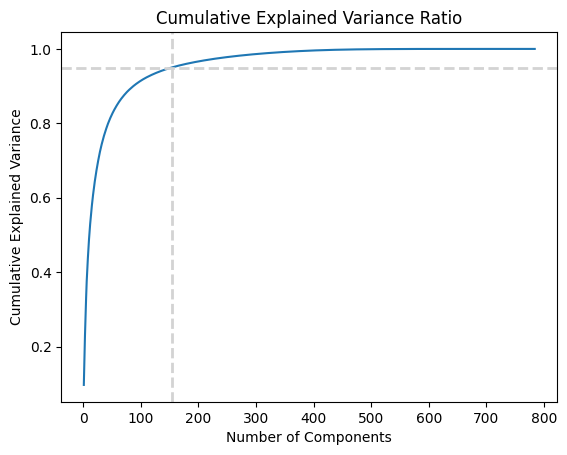

In [74]:
# 주성분들의 설명된 분산 비율 확인 (설명된 분산 비율이 높은 순서대로)

plt.plot(range(1, len(explained_var_ratio) + 1), explained_var_ratio.cumsum())
plt.axvline(154, 0, 1, color='lightgray', linestyle='--', linewidth=2)
plt.axhline(0.95, 0, 800, color='lightgray', linestyle='--', linewidth=2)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Ratio')
plt.show()

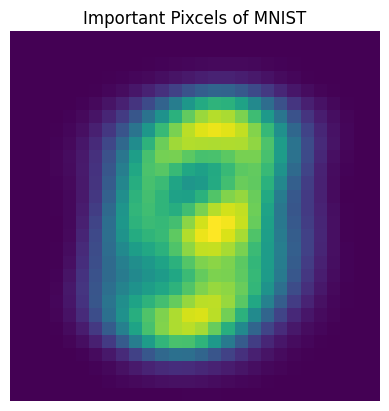

In [72]:
plt.imshow(pca.mean_.reshape(28, 28),  interpolation="nearest")
plt.axis('off')
plt.title("Important Pixcels of MNIST", fontsize=12)
plt.show()

### Random Forest with PCA

In [49]:
# 1. mnist
# 2. pca
# 3. rf
# Let's make a pipeline
# You can restart from here

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

mnist = keras.datasets.mnist

# load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

RandomForestClassifier(max_depth=10, random_state=42)

In [79]:
# initialize PCA model
pca = PCA(n_components=154)  # 주성분 개수를 50개로 설정 (예시용)

# PCA training
x_pca = pca.fit_transform(x_train)

clf = RandomForestClassifier(max_depth=10, random_state=42)
clf.fit(x_pca, y_train)

xtest_pca = pca.fit(x_test)
clf.score(x_test, y_test)

0.9485

In [53]:
from sklearn.pipeline import Pipeline

# Pipeline 구성
pipe = Pipeline([
    ('pca', PCA(n_components=154)),                                        # PCA
    ('classifier', RandomForestClassifier(max_depth=7, random_state=42))   # Random Forest Classifier
])

# Pipeline을 통한 모델 학습
pipe.fit(x_train, y_train)

# 평가
accuracy = pipe.score(x_test, y_test)
print(f"Accuracy: {accuracy}")

# ??

Accuracy: 0.8748


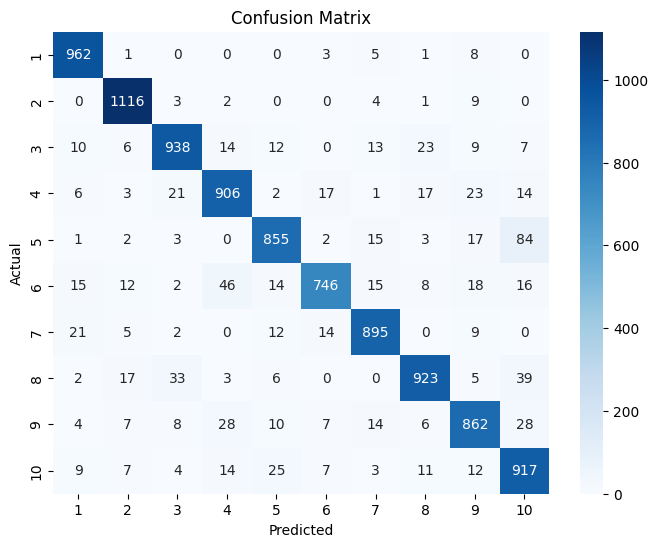

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 모델 예측
y_pred = clf.predict(x_test)

# Confusion Matrix 생성
cm = confusion_matrix(y_test, y_pred)

target = range(1, 11)
# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=target, yticklabels=target)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

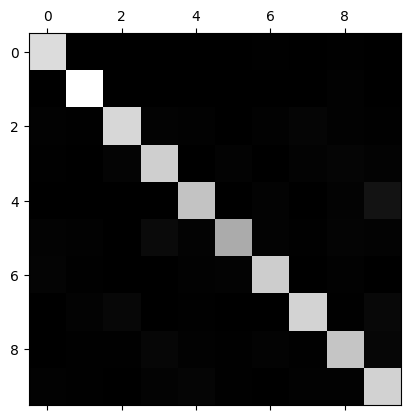

In [61]:
plt.matshow(cm, cmap=plt.cm.gray)
plt.show()

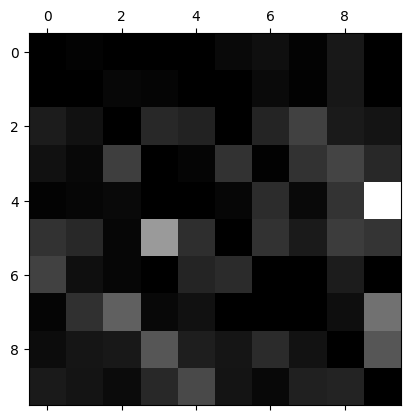

In [62]:
# Errors from Classifier

row_sums = cm.sum(axis=1, keepdims=True)
norm_cm = cm / row_sums

np.fill_diagonal(norm_cm, 0)
plt.matshow(norm_cm, cmap=plt.cm.gray)
plt.show()